In [55]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
client = MongoClient('mongodb://10.10.10.45:20000/')

In [57]:
# 时间线
doc_info = client['demo_docs']['doc_info']
doc_info.count_documents({})

9654154

In [58]:
# 心衰项目
patient_medical_history = client['demo_xinshuai_201803241749']['patient_medical_history']
# 上报病史数
f1 = {'toReport':'是','$or':[{'_delete':{'$exists':False}},{'_delete':False}]}
patient_medical_history.count_documents(f1)

119030

In [59]:
history_df = pd.DataFrame(list(patient_medical_history.find(f1, { '_id': 0, 'patientId': 1})))
history_df.head()

,patientId
0,23f47cb1-efaf-11e7-ae39-53ece1750c11
1,292eaed0-efaf-11e7-ae39-53ece1750c11
2,2fadbd01-efaf-11e7-8fb4-0ba8851511e3
3,5c456a41-c46a-11e7-93ca-d39b9bc884de
4,4c6c8f91-c46a-11e7-8534-c51051c27839


In [60]:
patient_basic_info = client['demo_docs']['patient_basic_info']
f2 = {"patientId": {'$in': history_df.patientId.tolist()}}
patient_df = pd.DataFrame(list(patient_basic_info.find(f2,{'_id': 0,'patientId':1,'patientBasicInfoIdCard':1,'patientBasicInfoPatientUserName':1,'patientBasicInfoGender':1,'patientBasicInfoBirthday':1})))
# 包含姓名+性别+出生年月
patient_df.loc[patient_df.patientBasicInfoPatientUserName.notnull() & patient_df.patientBasicInfoGender.notnull() & patient_df.patientBasicInfoBirthday.notnull()].count()

patientBasicInfoPatientUserName    90548
patientBasicInfoIdCard             87185
patientBasicInfoGender             90548
patientBasicInfoBirthday           90548
patientId                          90548
dtype: int64

In [61]:
# 包含姓名+性别+出生年月 & 不包含身份证
patient_df.loc[patient_df.patientBasicInfoPatientUserName.notnull() & patient_df.patientBasicInfoGender.notnull() & patient_df.patientBasicInfoBirthday.notnull() & patient_df.patientBasicInfoIdCard.isnull()].count()

patientBasicInfoPatientUserName    3363
patientBasicInfoIdCard                0
patientBasicInfoGender             3363
patientBasicInfoBirthday           3363
patientId                          3363
dtype: int64

In [62]:
doc_info_df = pd.DataFrame(list(doc_info.find({"diseaseId" : 47}).limit(200)))
doc_info_df.head()

,_id,oldHistoryId,diseaseId,hospitalId,deptId,historyId,sourceCode,sourceId,disease_type,cur_db_id,...,patientMedicalHistoryAdmissionDate,patientBasicInfoPatientUserName,patientBasicInfoIdCard,patientBasicInfoBirthday,patientBasicInfoGender,diseaseName,maxs,rc4,doctorId,oldPatientId
0,811f64e0-4144-11e8-a92a-85ae5ce88f9e,0028f88ecf7011e784f348435a7bd9f7,47,1,1,811f64e0-4144-11e8-a92a-85ae5ce88f9e,opci,all_of_them,history,67,...,1502955455000,f9865a594da682c41e0047fda832c514,13465aea2d2ed34a5e2fd0bb0d1ea01e,-950256000000,男,中国心衰中心数据填报平台,"[{'name': 'checkup_stent', 'counts': [], 'mess...",True,NaN,NaN
1,91d36c40-4163-11e8-a92a-85ae5ce88f9e,0231e42ccf7011e784f348435a7bd9f7,47,1,1,91d36c40-4163-11e8-a92a-85ae5ce88f9e,opci,all_of_them,history,67,...,1492764178000,64e1323f99c84d555fdc77ae6c852515,361b6a4f08b8e54cbe739225125343fc,-1360828800000,男,中国心衰中心数据填报平台,"[{'name': 'checkup_stent', 'counts': [], 'mess...",True,NaN,NaN
2,91d36c40-4163-11e8-9541-d52ed126af42,0c844290cf7011e784f348435a7bd9f7,47,1,1,91d36c40-4163-11e8-9541-d52ed126af42,opci,all_of_them,history,67,...,1498545095000,31c520d099a667c40b94c16008986801,c90fe470b46e21b64dc803c45a48f12e,-972633600000,男,中国心衰中心数据填报平台,"[{'name': 'checkup_stent', 'counts': [], 'mess...",True,NaN,NaN
3,91678b10-4163-11e8-b747-c3e522f61578,173c5f43cf7011e784f348435a7bd9f7,47,1,1,91678b10-4163-11e8-b747-c3e522f61578,opci,all_of_them,history,67,...,1500428211000,1db8487a8e1cd5903c4934fdb54868a4,70319376b3662893bce33ff64478c8e2,-920102400000,女,中国心衰中心数据填报平台,"[{'name': 'checkup_stent', 'counts': [], 'mess...",True,NaN,NaN
4,916c6d10-4163-11e8-9541-d52ed126af42,25111973cf7011e784f348435a7bd9f7,47,1,1,916c6d10-4163-11e8-9541-d52ed126af42,opci,all_of_them,history,67,...,1503554695000,729b293a89028b1b0a08b4b3a9e2db15,27ff73ed9eb709b08a1af54204f53cd8,-864028800000,男,中国心衰中心数据填报平台,"[{'name': 'checkup_stent', 'counts': [], 'mess...",True,NaN,NaN


In [63]:
hospital_rank_df = doc_info_df.loc[:, ['hospitalId', 'patientId']].groupby(['hospitalId']).count().sort_values(by=['patientId'], ascending=False).reset_index()
hospital_rank_df.head()

,hospitalId,patientId
0,692,187
1,1,11
2,718,2


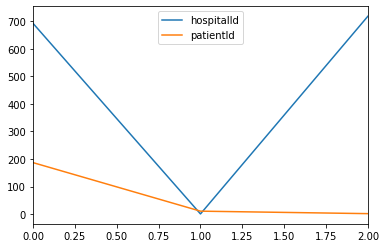

In [64]:
hospital_rank_df.plot()

In [65]:
emdata = pymysql.connect(host='10.10.10.13', port=3306, user='root', password='root', db='emdata', charset='utf8',cursorclass=pymysql.cursors.DictCursor)

In [66]:
hospital_df = pd.read_sql_query('select id, name from pr_hospital_info', emdata)
hospital_df.head()

,id,name
0,2,协和医院
1,3,待审核医院
2,7,太原市中心医院
3,8,山西大医院
4,9,中日友好医院


In [67]:
hospital_rank_df.join(hospital_df.set_index('id'), lsuffix='_left', rsuffix='_right', on=['hospitalId'])

,hospitalId,patientId,name
0,692,187,山东大学齐鲁医院青岛院区
1,1,11,NaN
2,718,2,测试医院
